In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['figure.dpi'] = 160

def save_plot(name: str):
    plt.savefig(f"plots/{name}.png", dpi=300)

In [3]:
accuracy_source_reproduction = pd.read_csv("tensorboard_data/reproduction-Accuracy_Train.csv")
accuracy_target_reproduction = pd.read_csv("tensorboard_data/reproduction-Accuracy_Val.csv")
loss_source_reproduction = pd.read_csv("tensorboard_data/reproduction-Loss_Train.csv")
loss_target_reproduction = pd.read_csv("tensorboard_data/reproduction-Loss_Val.csv")

accuracy_source_square = pd.read_csv("tensorboard_data/rectangle-Accuracy_Train.csv")
accuracy_target_square = pd.read_csv("tensorboard_data/rectangle-Accuracy_Val.csv")
loss_source_square = pd.read_csv("tensorboard_data/rectangle-Loss_Train.csv")
loss_target_square = pd.read_csv("tensorboard_data/rectangle-Loss_Val.csv")

accuracy_source_circle = pd.read_csv("tensorboard_data/circle-Accuracy_Train.csv")
accuracy_target_circle = pd.read_csv("tensorboard_data/circle-Accuracy_Val.csv")
loss_source_circle = pd.read_csv("tensorboard_data/circle-Loss_Train.csv")
loss_target_circle = pd.read_csv("tensorboard_data/circle-Loss_Val.csv")

accuracy_source_gaussian = pd.read_csv("tensorboard_data/gaussian-Accuracy_Train.csv")
accuracy_target_gaussian = pd.read_csv("tensorboard_data/gaussian-Accuracy_Val.csv")
loss_source_gaussian = pd.read_csv("tensorboard_data/gaussian-Loss_Train.csv")
loss_target_gaussian = pd.read_csv("tensorboard_data/gaussian-Loss_Val.csv")

accuracy_source_gaussian_reproduction = pd.read_csv("tensorboard_data/reproduction-gaussian-Accuracy_Train.csv")
accuracy_target_gaussian_reproduction = pd.read_csv("tensorboard_data/reproduction-gaussian-Accuracy_Val.csv")
loss_source_gaussian_reproduction = pd.read_csv("tensorboard_data/reproduction-gaussian-Loss_Train.csv")
loss_target_gaussian_reproduction = pd.read_csv("tensorboard_data/reproduction-gaussian-Loss_Val.csv")

In [4]:
def smooth_line(series: pd.Series, factor=0.6):
    return series.ewm(alpha=(1 - factor)).mean()

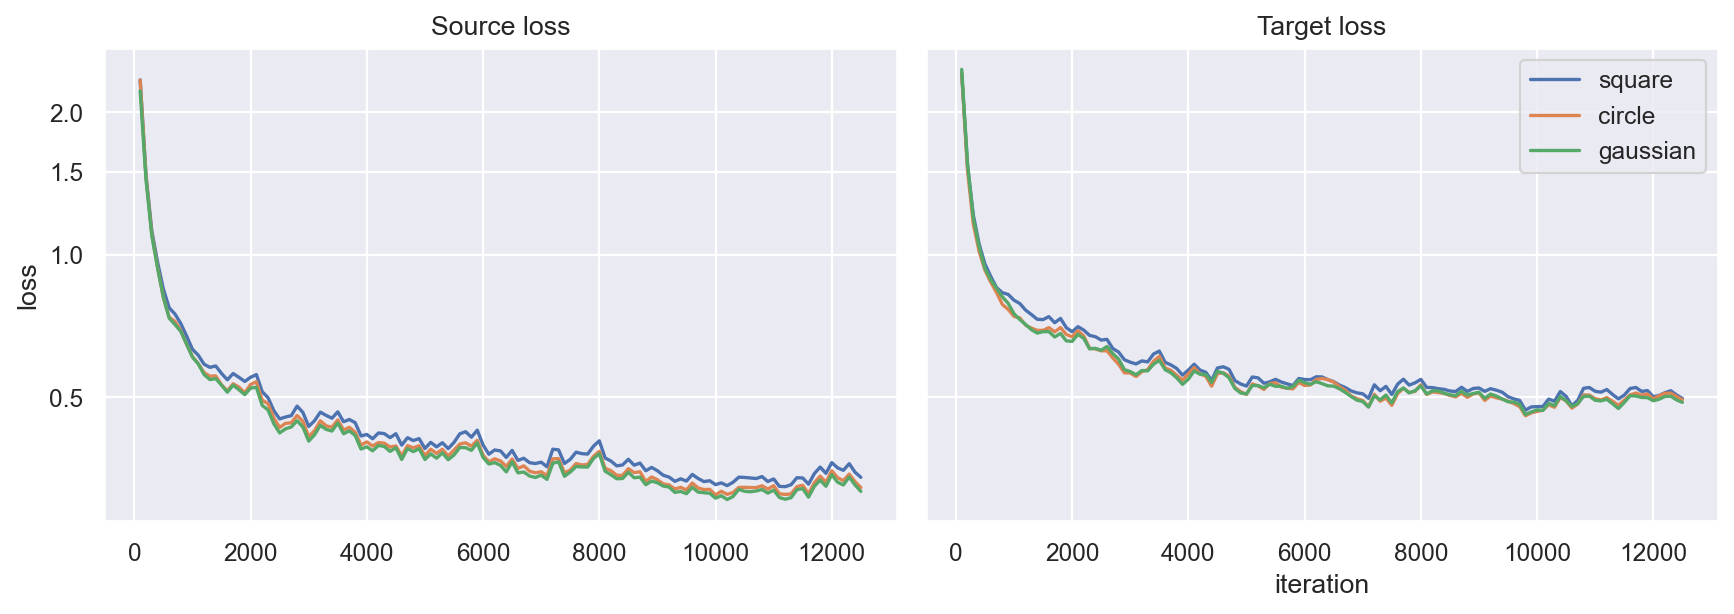

In [83]:
sns.set_theme()

step = accuracy_source_square.Step

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(11, 4))

ax[0].plot(step, smooth_line(loss_source_square.Value), label="square")
ax[0].plot(step, smooth_line(loss_source_circle.Value), label="circle")
ax[0].plot(step, smooth_line(loss_source_gaussian.Value), label="gaussian")

# ax[0].axhline(loss_source_gaussian.Value.iloc[-1], color="grey", ls=":")

ax[0].set_yscale("log")
ax[0].set_title("Source loss")
ax[0].set_ylabel("loss")
ax[0].set_yticks([ 0.5, 1.0, 1.5, 2.0])
ax[0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[0].get_yaxis().get_major_formatter().labelOnlyBase = False

ax[1].plot(step, smooth_line(loss_target_square.Value), label="square")
ax[1].plot(step, smooth_line(loss_target_circle.Value), label="circle")
ax[1].plot(step, smooth_line(loss_target_gaussian.Value), label="gaussian")

# ax[1].axhline(loss_source_gaussian.Value.iloc[-1], color="grey", ls=":")

ax[1].set_title("Target loss")
ax[1].set_xlabel("iteration")

plt.legend()
plt.tight_layout()

save_plot("fda_loss")

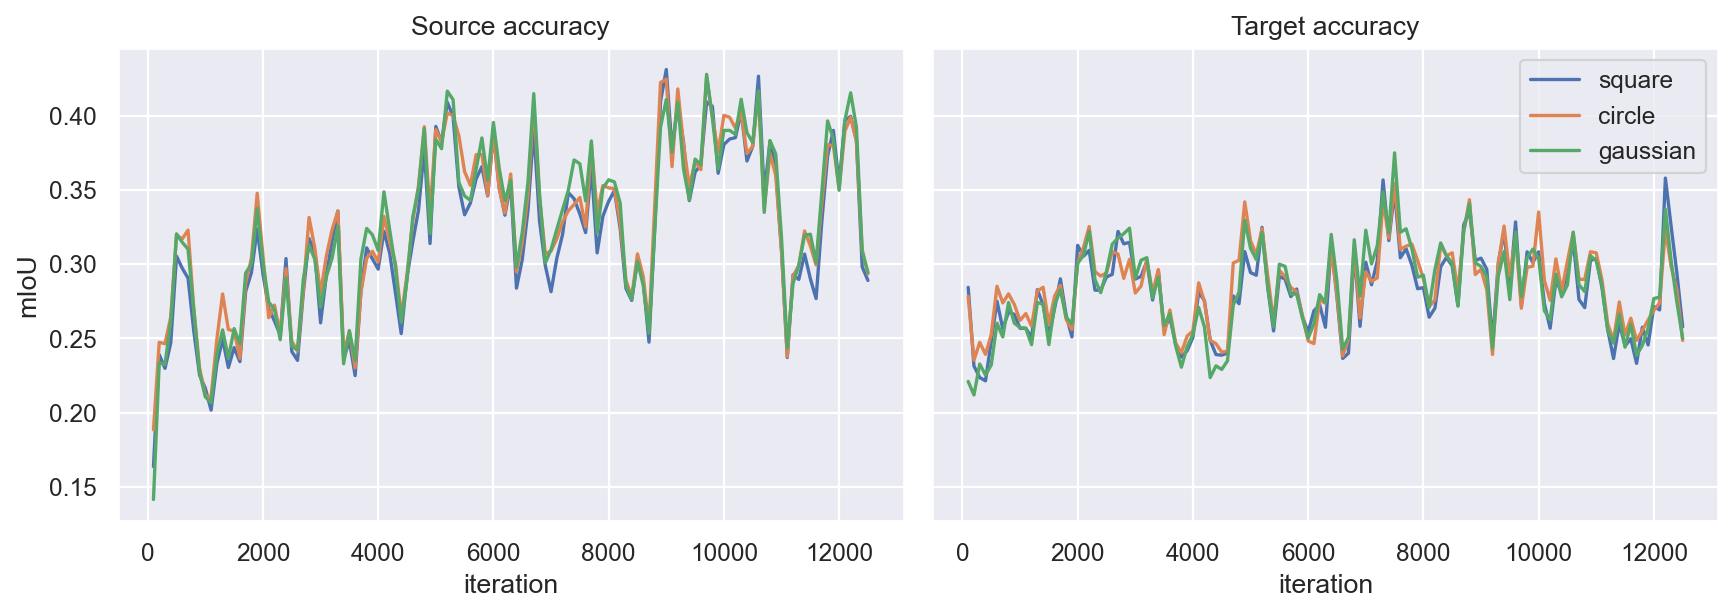

In [100]:
step = accuracy_source_square.Step

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(11, 4))

ax[0].plot(step, smooth_line(accuracy_source_square.Value), label="square")
ax[0].plot(step, smooth_line(accuracy_source_circle.Value), label="circle")
ax[0].plot(step, smooth_line(accuracy_source_gaussian.Value), label="gaussian")

ax[0].set_title("Source accuracy")
ax[0].set_xlabel("iteration")
ax[0].set_ylabel("mIoU")

ax[1].plot(step, smooth_line(accuracy_target_square.Value), label="square")
ax[1].plot(step, smooth_line(accuracy_target_circle.Value), label="circle")
ax[1].plot(step, smooth_line(accuracy_target_gaussian.Value), label="gaussian")

ax[1].set_title("Target accuracy")
ax[1].set_xlabel("iteration")

plt.legend()
plt.tight_layout()

save_plot("fda_accuracy")

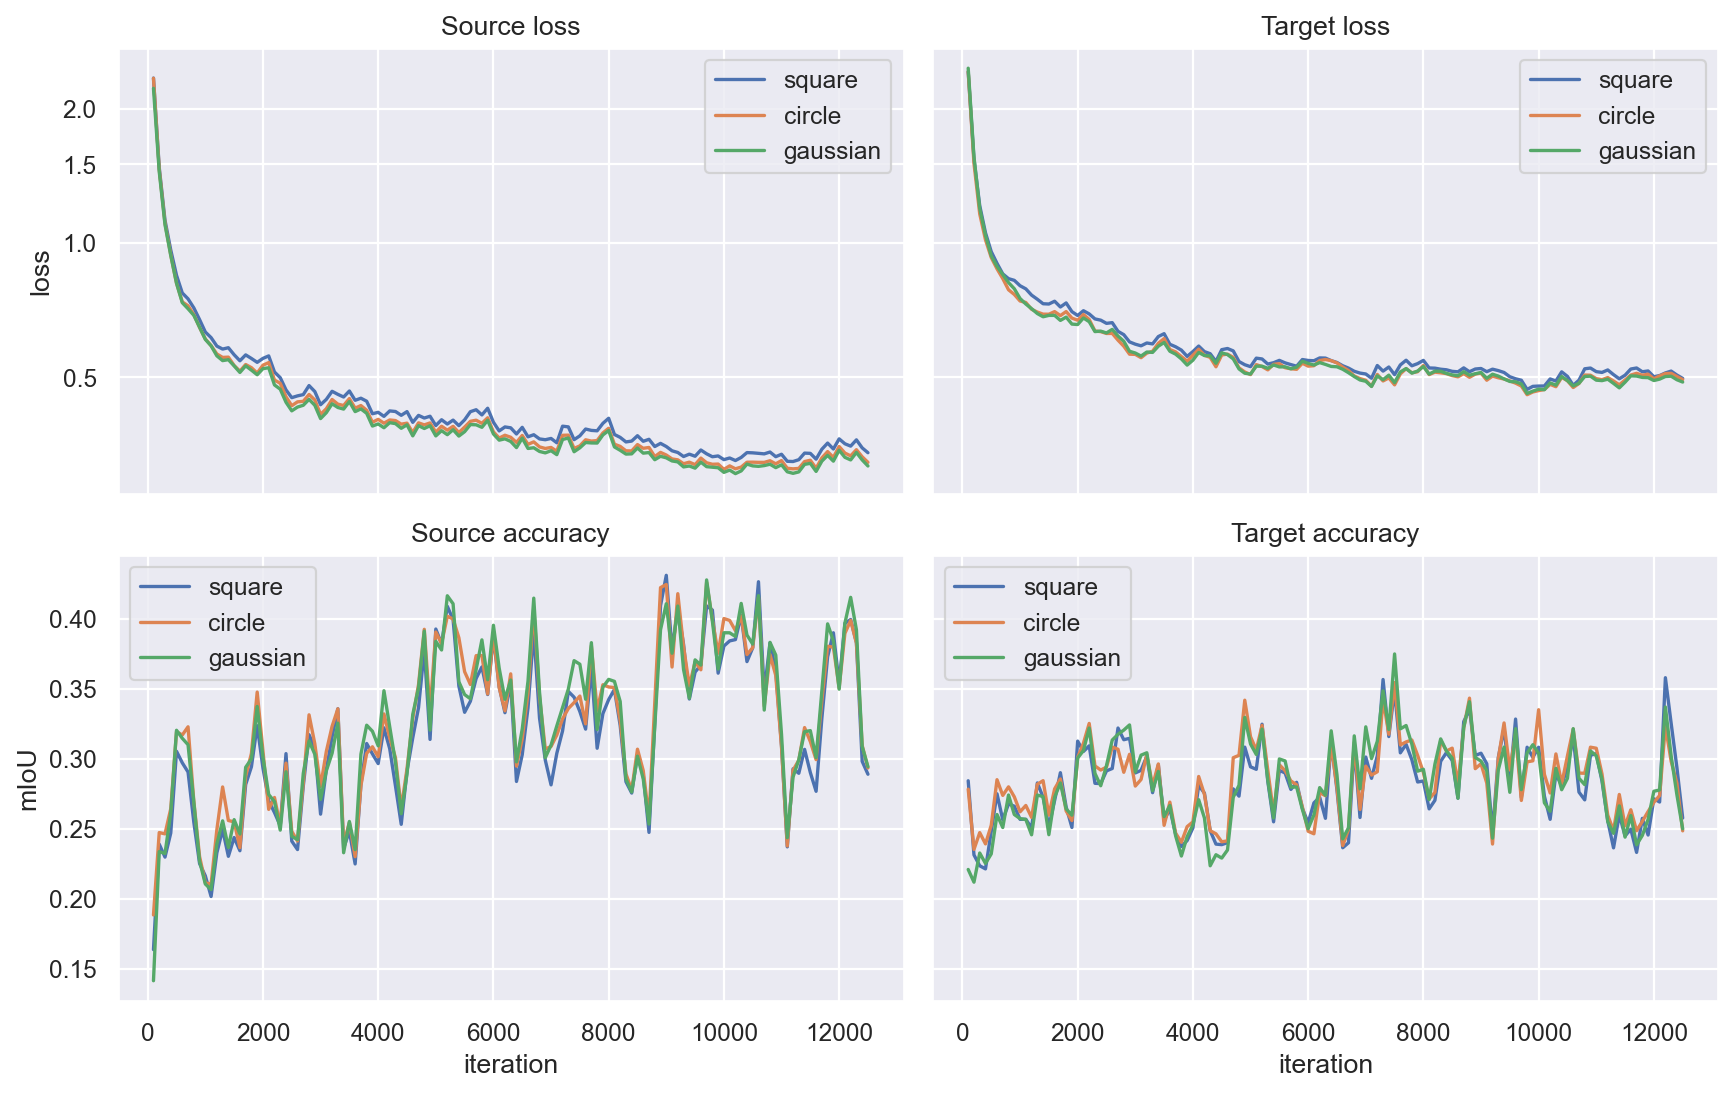

In [27]:
sns.set_theme()

step = accuracy_source_square.Step

fig, ax = plt.subplots(2, 2, sharex=True, sharey="row", figsize=(11, 7))

ax[0, 0].plot(step, smooth_line(loss_source_square.Value), label="square")
ax[0, 0].plot(step, smooth_line(loss_source_circle.Value), label="circle")
ax[0, 0].plot(step, smooth_line(loss_source_gaussian.Value), label="gaussian")

ax[0, 0].set_yscale("log")
ax[0, 0].set_title("Source loss")
ax[0, 0].set_ylabel("loss")
ax[0, 0].set_yticks([ 0.5, 1.0, 1.5, 2.0])
ax[0, 0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[0, 0].get_yaxis().get_major_formatter().labelOnlyBase = False
ax[0, 0].legend()

ax[0, 1].plot(step, smooth_line(loss_target_square.Value), label="square")
ax[0, 1].plot(step, smooth_line(loss_target_circle.Value), label="circle")
ax[0, 1].plot(step, smooth_line(loss_target_gaussian.Value), label="gaussian")

ax[0, 1].set_title("Target loss")
ax[0, 1].legend()

ax[1, 0].plot(step, smooth_line(accuracy_source_square.Value), label="square")
ax[1, 0].plot(step, smooth_line(accuracy_source_circle.Value), label="circle")
ax[1, 0].plot(step, smooth_line(accuracy_source_gaussian.Value), label="gaussian")

ax[1, 0].set_title("Source accuracy")
ax[1, 0].set_xlabel("iteration")
ax[1, 0].set_ylabel("mIoU")
ax[1, 0].legend()

ax[1, 1].plot(step, smooth_line(accuracy_target_square.Value), label="square")
ax[1, 1].plot(step, smooth_line(accuracy_target_circle.Value), label="circle")
ax[1, 1].plot(step, smooth_line(accuracy_target_gaussian.Value), label="gaussian")

ax[1, 1].set_title("Target accuracy")
ax[1, 1].set_xlabel("iteration")
ax[1, 1].legend()

plt.tight_layout()

save_plot("fda_loss_accuracy")

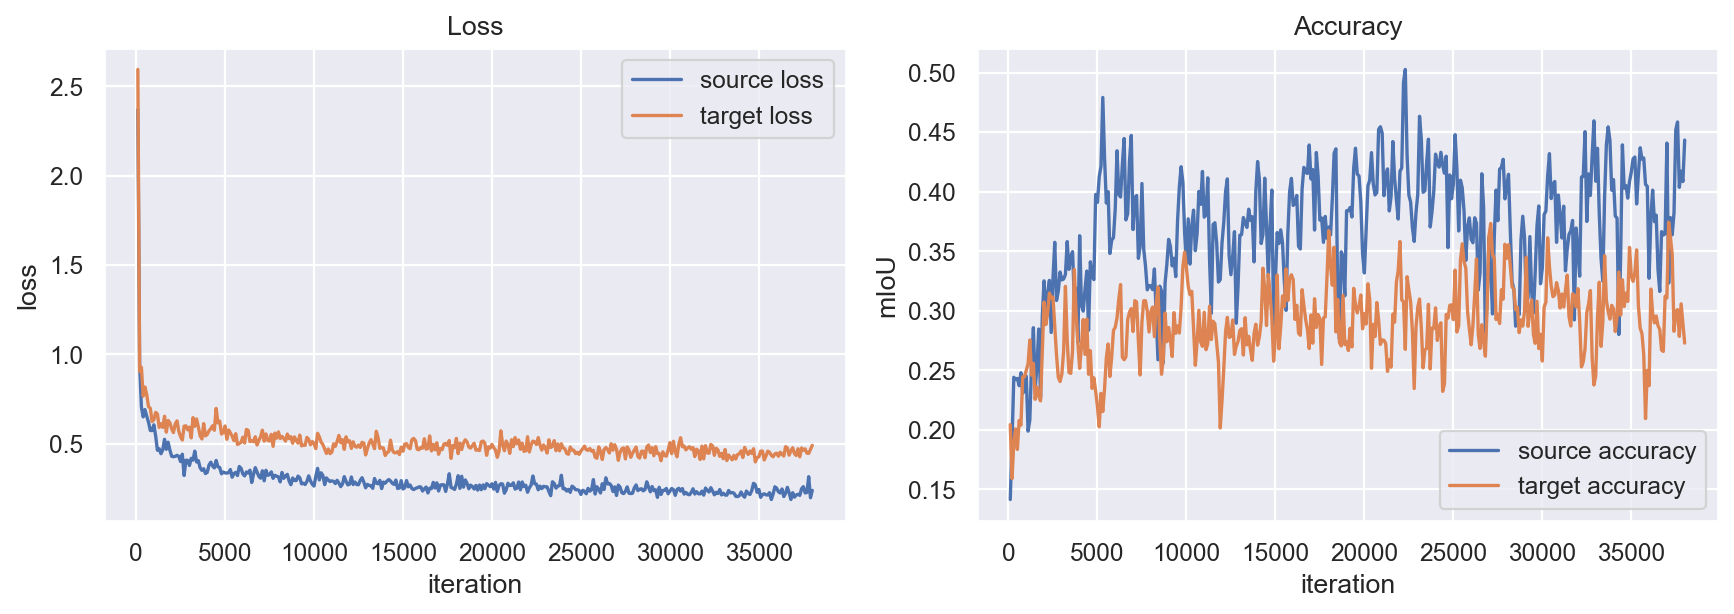

In [98]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False, figsize=(11, 4))

step = loss_source_reproduction.Step

ax[0].plot(step, smooth_line(loss_source_reproduction.Value, 0), label="source loss")
ax[0].plot(step, smooth_line(loss_target_reproduction.Value, 0), label="target loss")

ax[0].set_title("Loss")
ax[0].set_xlabel("iteration")
ax[0].set_ylabel("loss")

ax[0].legend()

ax[1].plot(step, smooth_line(accuracy_source_reproduction.Value), label="source accuracy")
ax[1].plot(step, smooth_line(accuracy_target_reproduction.Value), label="target accuracy")

ax[1].set_title("Accuracy")
ax[1].set_xlabel("iteration")
ax[1].set_ylabel("mIoU")

ax[1].legend()
plt.tight_layout()

save_plot("reproduction_loss_accuracy")

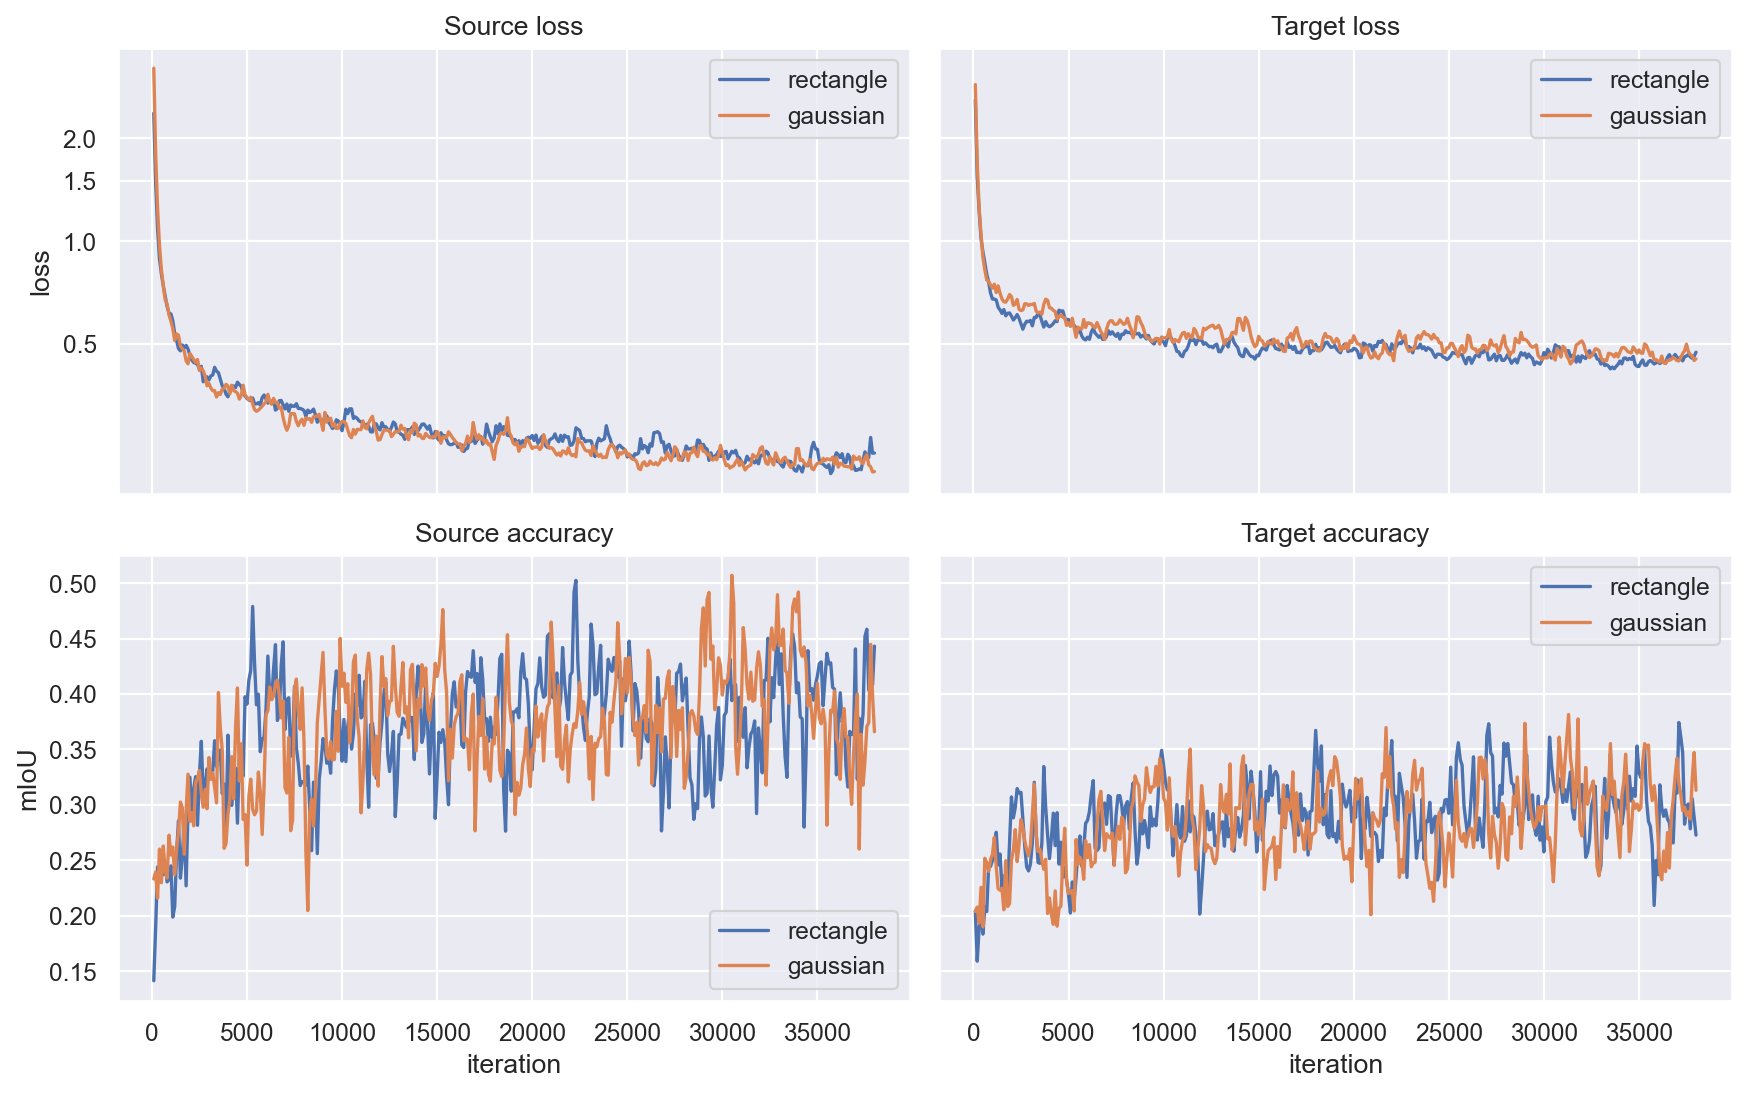

In [26]:
sns.set_theme()

fig, ax = plt.subplots(2, 2, sharex=True, sharey="row", figsize=(11, 7))

step = loss_source_reproduction.Step

ax[0, 0].plot(step, smooth_line(loss_source_reproduction.Value), label="square")
ax[0, 0].plot(step, smooth_line(loss_source_gaussian_reproduction.Value), label="gaussian")

ax[0, 0].set_title("Source loss")
ax[0, 0].set_ylabel("loss")
ax[0, 0].set_yscale("log")
ax[0, 0].set_yticks([ 0.5, 1.0, 1.5, 2.0])
ax[0, 0].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[0, 0].get_yaxis().get_major_formatter().labelOnlyBase = False
ax[0, 0].legend()

ax[0, 1].plot(step, smooth_line(loss_target_reproduction.Value), label="square")
ax[0, 1].plot(step, smooth_line(loss_target_gaussian_reproduction.Value), label="gaussian")

ax[0, 1].set_title("Target loss")
# ax[0, 1].set_ylabel("loss")
# ax[0, 1].set_yscale("log")
# ax[0, 1].set_yticks([0.5, 1.0, 1.5, 2.0])
# ax[0, 1].get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax[0, 1].get_yaxis().get_major_formatter().labelOnlyBase = False
ax[0, 1].legend()

ax[1, 0].plot(step, smooth_line(accuracy_source_reproduction.Value), label="square")
ax[1, 0].plot(step, smooth_line(accuracy_source_gaussian_reproduction.Value), label="gaussian")

ax[1, 0].set_title("Source accuracy")
ax[1, 0].set_xlabel("iteration")
ax[1, 0].set_ylabel("mIoU")
ax[1, 0].legend()

ax[1, 1].plot(step, smooth_line(accuracy_target_reproduction.Value), label="square")
ax[1, 1].plot(step, smooth_line(accuracy_target_gaussian_reproduction.Value), label="gaussian")

ax[1, 1].set_title("Target accuracy")
ax[1, 1].set_xlabel("iteration")
ax[1, 1].legend()

plt.tight_layout()

save_plot("reproduction_loss_accuracy")